# Testing NoteBook

[*********************100%***********************]  6 of 6 completed


              weights
IRCTC.NS      9.3731%
JYOTHYLAB.NS 29.1267%
NTPC.NS      38.7085%
ONGC.NS       9.7463%
SBIN.NS       4.7707%
TATASTEEL.NS  8.2747%


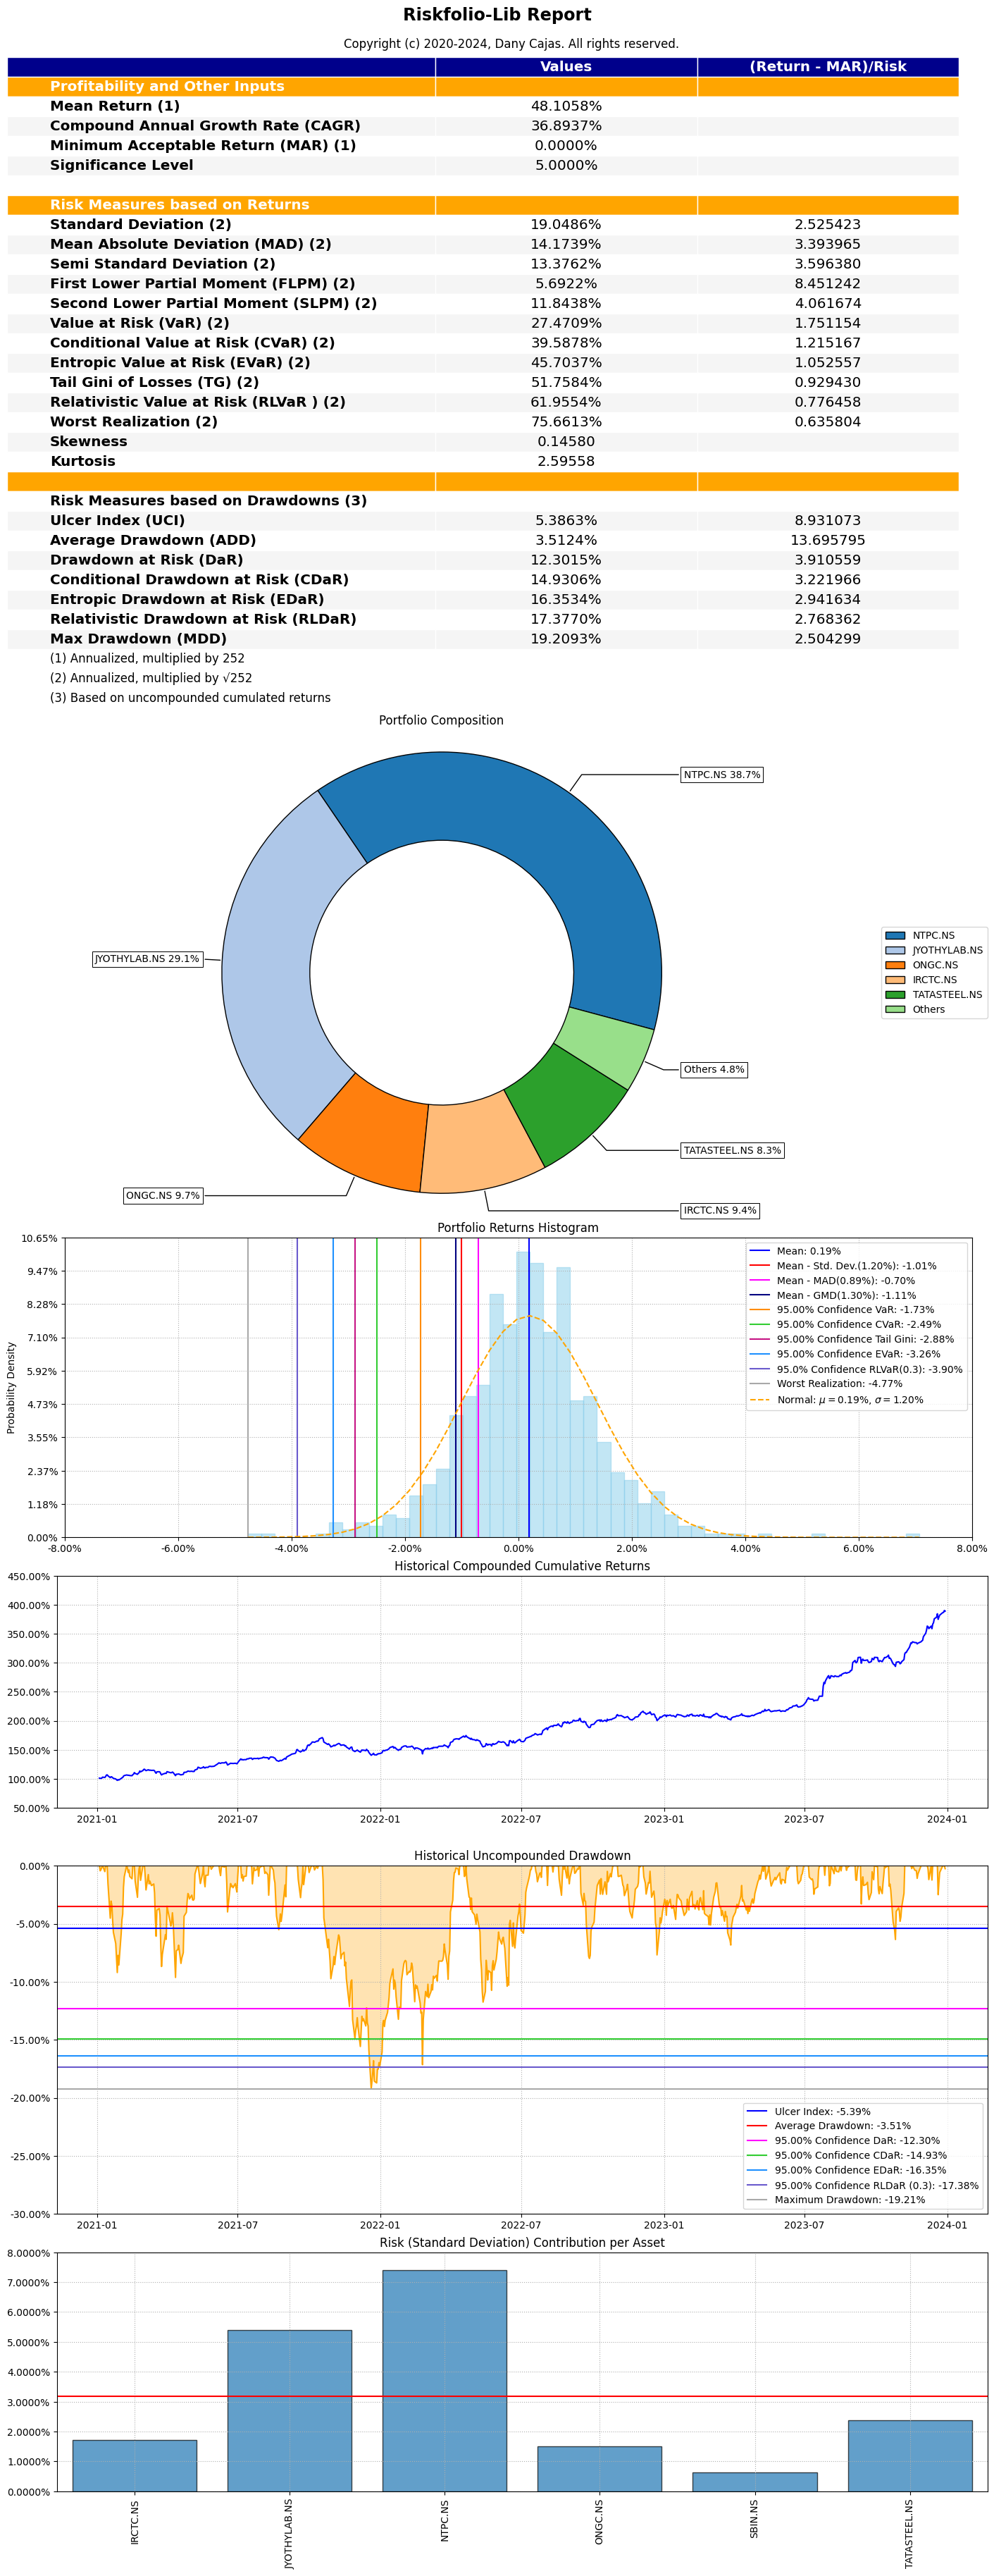

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt

# yf.pdr_override()

# Date range
start = '2021-01-01'
end = '2023-12-30'

# Tickers of assets
tickers =[ 'ONGC.NS', 'NTPC.NS', 'JYOTHYLAB.NS', 'TATASTEEL.NS', 'SBIN.NS', 'IRCTC.NS']

tickers.sort()

# Downloading the data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers
assets = data.pct_change().dropna()

Y = assets

# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MV'  # Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate the portfolio that maximizes the risk adjusted return ratio
w = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)
print(w)
ax = rp.jupyter_report(assets,
                       w,
                       rm='MV',
        
                       )
plt.show()

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Tickers of factors
factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading the data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers
returns = data.pct_change().dropna()

Y = returns[assets]
X = returns[factors]

# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MSV'  # Semi Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

mu = port.mu
cov = port.cov

# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

# Estimate points in the efficient frontier mean - semi standard deviation
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

# Estimate the risk parity portfolio for risk factors
port.factors = X
port.factors_stats(method_mu=method_mu,
                   method_cov=method_cov,
                   feature_selection='stepwise',
                   stepwise='Forward')
w3 = port.rp_optimization(model='FC', rm='MV', rf=0, b_f=None)

# Estimate the risk parity portfolio for principal components
port.factors = X
port.factors_stats(method_mu=method_mu,
                   method_cov=method_cov,
                   feature_selection='PCR',
                   n_components=0.95)
w4 = port.rp_optimization(model='FC', rm='MV', rf=0, b_f=None)


[*********************100%***********************]  30 of 30 completed


TypeError: Portfolio.factors_stats() got an unexpected keyword argument 'stepwise'

In [ ]:
ax = rp.plot_series(returns=Y,
                    w=ws,
                    cmap='tab20',
                    height=6,
                    width=10,
                    ax=None)
